In [1]:
## NOTE: This is Python 3 code.
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0

In [8]:
# Data Generation Code
genes = ['gene' + str(i) for i in range(1,1206)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.read_csv('students_adaptability_level_online_education.csv')

In [9]:
#Transformando os dados não númericos em númericos.
data = data[['Gender', 'Age', 'Class Duration', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device', 'Adaptivity Level']].apply(lambda x: pd.factorize(x)[0])
print(data.head())
print(data.shape)

   Gender  Age  Class Duration  Education Level  Institution Type  IT Student  \
0       0    0               0                0                 0           0   
1       1    0               1                0                 0           0   
2       1    1               1                1                 1           0   
3       1    2               1                2                 0           0   
4       1    1               2                2                 0           0   

   Location  Load-shedding  Financial Condition  Internet Type  Network Type  \
0         0              0                    0              0             0   
1         0              1                    0              1             0   
2         0              0                    0              0             0   
3         0              0                    0              1             0   
4         0              0                    1              1             1   

   Self Lms  Device  Adaptivity 

In [10]:
# Perform PCA on the data
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

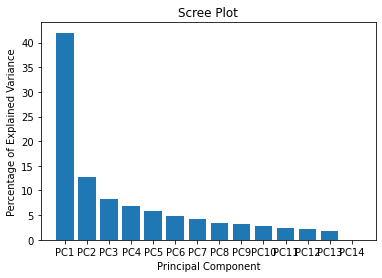

In [11]:
# Draw a scree plot and a PCA plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

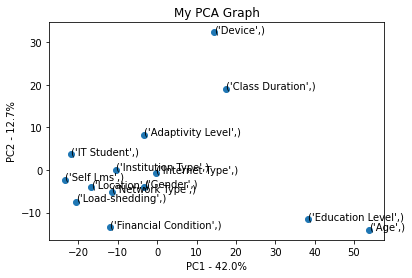

In [12]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[['Gender', 'Age', 'Class Duration', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device', 'Adaptivity Level']], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [13]:
# Determine which genes had the biggest influence on PC1
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene8       0.042258
gene292     0.042258
gene802     0.042258
gene661     0.042258
gene300     0.042258
gene1129    0.042258
gene920     0.041987
gene457     0.041987
gene595     0.041987
gene355     0.041987
dtype: float64
